In [28]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data_dir = '/content/gdrive/MyDrive/Klasifikasi'

In [5]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 2 classes.
Using 800 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1000 files belonging to 2 classes.
Using 200 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Cat', 'Dog']


In [9]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='sigmoid'))

In [10]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_3 (ModuleWra  (None, 2048)             0         
 pper)                                                           
                                                                 
 module_wrapper_4 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 2)                1026      
 pper)                                                           
                                                                 
Total params: 24,637,826
Trainable params: 1,050,114
Non-trainable params: 23,587,712
__________________________________

In [11]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
epochs=20
history = resnet_model.fit(
  train_ds, 
  validation_data=val_ds, 
  epochs=epochs
)

Epoch 1/20
25/25 [==============================] - 79s 2s/step - loss: 0.3540 - accuracy: 0.9087 - val_loss: 0.0755 - val_accuracy: 0.9800
Epoch 2/20
25/25 [==============================] - 5s 176ms/step - loss: 0.0174 - accuracy: 0.9950 - val_loss: 0.0404 - val_accuracy: 0.9750
Epoch 3/20
25/25 [==============================] - 6s 197ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0364 - val_accuracy: 0.9850
Epoch 4/20
25/25 [==============================] - 5s 178ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0302 - val_accuracy: 0.9850
Epoch 5/20
25/25 [==============================] - 5s 180ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0288 - val_accuracy: 0.9800
Epoch 6/20
25/25 [==============================] - 5s 180ms/step - loss: 8.6276e-04 - accuracy: 1.0000 - val_loss: 0.0283 - val_accuracy: 0.9800
Epoch 7/20
25/25 [==============================] - 5s 177ms/step - loss: 6.8308e-04 - accuracy: 1.0000 - val_loss: 0.0281 - val_accuracy: 0.9800


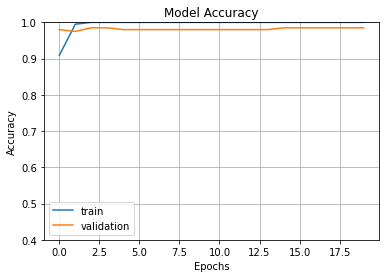

In [13]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

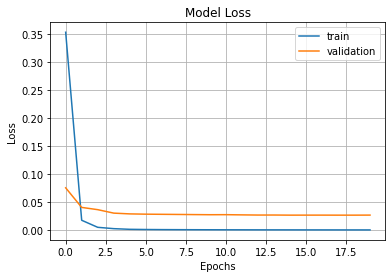

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [15]:
resnet_model.evaluate(train_ds)

25/25 [==============================] - 4s 129ms/step - loss: 1.2374e-04 - accuracy: 1.0000


[0.0001237419928656891, 1.0]

In [16]:
print("Saving the model.")
saveloc = "/content/gdrive/MyDrive/model"
resnet_model.save(saveloc)
print("Model saved to: " + saveloc + " succesfully.")

Saving the model.


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/model/assets


INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/model/assets


Model saved to: /content/gdrive/MyDrive/model succesfully.


In [ ]:
import pathlib
import glob
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow as show

In [ ]:
dir='/content/gdrive/MyDrive/anjing.jpg'
im=Image.open(dir)
print(im.size, im.format, im.mode)

(275, 183) JPEG RGB


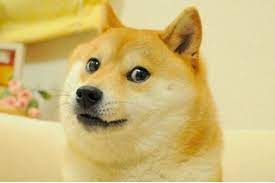

In [ ]:
img_1=cv2.imread(dir)
show(img_1)

In [ ]:
img_resized= cv2.resize(img_1, (img_height,img_width))

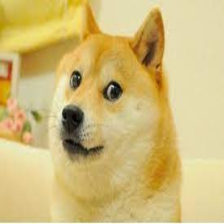

In [ ]:
show(img_resized)

In [ ]:
img_1=np.expand_dims(img_resized,axis=0)
print(img_1.shape)

(1, 224, 224, 3)


In [ ]:
pred=resnet_model.predict(img_1)
print(pred)

[[1.9117721e-04 9.9980885e-01]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is Dog
